## Deposition Models

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats as stats

#### Parent class  
Both Random Deposition and Ballistic Deposition models have identical structure and the only difference is in the rule how do new blocks attach to the blocks that already had fallen.

In [2]:
class Deposition: 
    """This is a parent class for all deposition models. RandomDeposition and 
    BallisticDeposition classes will inherit common behaviour from this class.
    """
# --------------------------------------------------------------------------------        
    def __init__(self, size): # this is a constructor of an object of class Deposition
        """This creates an instance of a class Deposition of length size.
        
        The instance would have 5 fields:
        
        Size - width of the lattice
        Heights - current heights of every column
        CurrentTime - currenttime of the configuration since its creation
        Times - times taken for the next block to fall in each column since now
        NextBrick - the position of the next brick to fall; this corresponds to a minimum of Times
        """
        if (not (isinstance(size, int)) or size <= 0): #checks whether the size is integer and positive
            raise ValueError ("The size of the model should be positive integer.")
        
        self.Size = size # assigns size of the system
        self.Heights = np.zeros(size, dtype = 'int') #assigns Heights to be the list of zeros
        self.CurrentTime = 0 #assigns current time to be 0
        
        self.Times = np.random.exponential(scale = 1, size = size) #assigns random, exponentially distributed times until the next block fall
        self.NextBrick = np.argmin(self.Times) #evaluates the column number where next brick will fall
        
# --------------------------------------------------------------------------------
    def __str__(self): #defines a format of output of the instance of class Deposition
        return "At T = {:.2f} the height function is {}".format(self.CurrentTime,self.Heights)
        
# --------------------------------------------------------------------------------        
    def UpdateHeights(self, index): #Defines the way a new block is attached
        """This method is not implemented because it will have a different way
        of implementation for different child classes        
        """
        raise NotImplementedError ("The method is not implemented")

# --------------------------------------------------------------------------------    
    def UpdateConfiguration(self, dt):
        """
        This is a method that simmulates a configuration of the model after time dt.
        If this time is less than the time until next brick to fall, 
        then we just update all times by shifting them by dt.
        If there is a brick to fall in less than dt time, then we simmulate the fall,
        calculate the time left to simmulate and repeat the procedure. This method
        is implemented using recursion.
        """
        TimeToNextBrick = self.Times[self.NextBrick] #calculate the time until next brick to fall
        
        if (dt<TimeToNextBrick): #if there is no brick to fall, then just shift all times
            self.Times -= dt
            self.CurrentTime += dt
        else: #if there is a brick to fall, shift times until the next fall happening
            self.Times -= TimeToNextBrick
            self.CurrentTime += TimeToNextBrick
            
            self.UpdateHeights(self.NextBrick) #stick a brick
            
            self.Times[self.NextBrick] = np.random.exponential(scale = 1) #generate a new time until next brick for the column where the last brick has fallen
            self.NextBrick = np.argmin(self.Times) # recalculate the index of the column where the next brick will fall
            
            self.UpdateConfiguration(dt-TimeToNextBrick) #continue the update for the rest of the time

#### RandomDeposition class

In [3]:
class RandomDeposition(Deposition):
    
# --------------------------------------------------------------------------------            
    def UpdateHeights(self, index): 
        """This is an implementation of UpdateHeights method from the parent class.
        """
        self.Heights[index] = self.Heights[index]+1 
        # if the brick falls into column i, we just increase its height by 1

In [4]:
RandomDepositionModel = RandomDeposition(10)

We can now update it in time. Let us update it 10 times for 10 units of time each time.

In [5]:
M = 10
T = 10
for i in range(M):
    RandomDepositionModel.UpdateConfiguration(T)
    print(RandomDepositionModel)

At T = 10.00 the height function is [ 8 10 13 13 11  8 12  8 11 12]
At T = 20.00 the height function is [17 16 19 23 16 19 19 16 18 26]
At T = 30.00 the height function is [30 28 29 36 30 31 26 26 29 33]
At T = 40.00 the height function is [39 38 41 45 38 38 40 36 38 45]
At T = 50.00 the height function is [52 48 56 54 46 52 46 44 44 55]
At T = 60.00 the height function is [64 56 67 65 51 59 54 52 49 70]
At T = 70.00 the height function is [70 64 79 72 62 69 72 56 58 78]
At T = 80.00 the height function is [73 68 91 79 75 82 85 64 74 86]
At T = 90.00 the height function is [ 82  81 106  89  85  90  88  70  80  94]
At T = 100.00 the height function is [ 92  87 116 107  91  96  97  75  93 106]


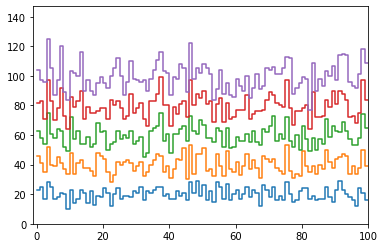

In [6]:
N = 100
M = 5
T = 20

#generating the model
RandomDepositionModel = RandomDeposition(N)


#initialize drawing
plt.axes(xlim = (-1, N), ylim = (0, (T+1)*(M+2))) # the axes are set by experimenting. don't try to interpret (M+2)*(T+1) as something model specific

#updating and drawing
for i in range(M):
    RandomDepositionModel.UpdateConfiguration(T)
    plt.step(np.arange(N+1), np.append(RandomDepositionModel.Heights,RandomDepositionModel.Heights[-1]), where='post')

#showing the plot
plt.show()

Random deposition configuration of length 10 and simmulation of its growth in 10 units of time

In [7]:
RandomDepositionModel = RandomDeposition(10)
RandomDepositionModel.UpdateConfiguration(10)
print(RandomDepositionModel)

At T = 10.00 the height function is [ 8 10  9  8  9  9  6 12 10 12]


In [8]:
N = 100
M = 400
T = 64
dt = 1

We are now ready to simmulate the growth process and run corresponding statistical analysis <a id="model_stats"></a>

In [9]:
Column1 = 20
Column2 = 40
Column3 = 60
Data1 = []
Data2 = []
Data3 = []

for m in range(M):
    RandomDepositionModel = RandomDeposition(N)
    for j in range(int(T/dt)):
        RandomDepositionModel.UpdateConfiguration(dt)
    Data1.append((RandomDepositionModel.Heights[Column1]-T)/np.sqrt(T))
    Data2.append((RandomDepositionModel.Heights[Column2]-T)/np.sqrt(T))
    Data3.append((RandomDepositionModel.Heights[Column3]-T)/np.sqrt(T))

In the data Data1, Data2, Data3 we collect the height function of the corresponding columns 20,40,60 minus current time and divided by the square root of the time.

In [10]:
#we prepare a dataframe containing the data to analyse
Columns = [Column1, Column2, Column3]
Data = pd.DataFrame(dict(zip(Columns,[Data1,Data2,Data3])))
print(Data)

        20     40     60
0   -0.500 -0.125  0.875
1    1.250  0.000 -0.250
2   -0.375  3.500 -0.250
3    0.250  0.000  0.250
4   -1.875 -1.000  1.000
..     ...    ...    ...
395 -0.250 -0.500  0.375
396 -1.375  0.375  0.750
397 -1.250 -0.250  0.375
398 -0.375 -1.125  0.125
399 -0.875  0.375  0.125

[400 rows x 3 columns]


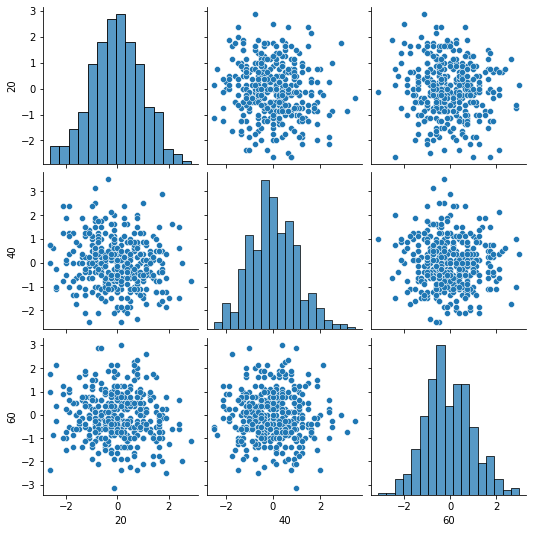

In [11]:
sns.pairplot(Data)
plt.show()

From the above one can see that the distribution of the height function at every column is close to normal. While the spread of the points in scatter plots clearly shows that there is no correlation between the heights at different columns. Let us test our hypothesis.

_Data1 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

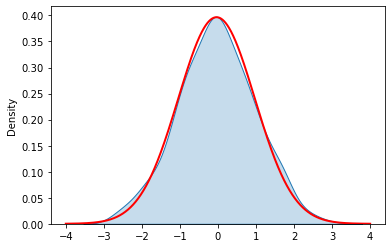

In [12]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data1)

#plot the histogram
axes = sns.kdeplot(Data1, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [13]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data1)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is normal


_Data2 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

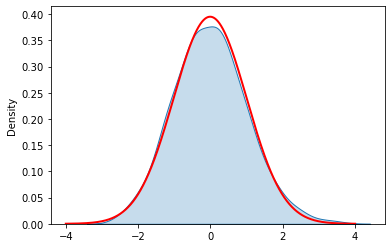

In [14]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data2)

#plot the histogram
axes = sns.kdeplot(Data2, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [15]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data2)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is normal


_Data3 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

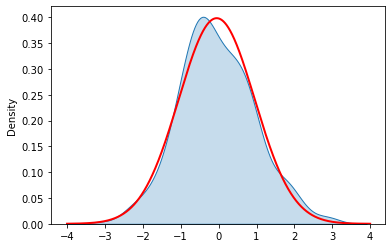

In [16]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data3)

#plot the histogram
axes = sns.kdeplot(Data3, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [17]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data3)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is normal


To see the absence of correlations we can study the correlation matrix between columns.

In [18]:
Data.corr()

,20,40,60
20,1.000000,-0.116148,-0.072318
40,-0.116148,1.000000,-0.023176
60,-0.072318,-0.023176,1.000000


The correlations are very low and thus we can confirm an independence of the height function at different columns.

## Ballistic deposition model


**3. [15 marks]** Let us define a new ```class BallisticDeposition``` as follows.

In [19]:
class BallisticDeposition(Deposition):
    
# --------------------------------------------------------------------------------            
    def UpdateHeights(self, index):
        """
        This is an implementation of UpdateHeights method from the parent class.
        """
        
        HeightOnLeft = 0 # define a variable to store the height of a neighbouring column on the left
        HeightOnRight = 0 # define a variable to store the height of a neighbouring column on the right
        
        if (index>0): 
            # If the column we try to update is not the first one, then we need to check what is the height on the left. 
            # Otherwise it will be left as zero and would not contribute to a change of the height function
            HeightOnLeft = self.Heights[index-1]
        if (index<self.Size-1): 
            # If the column we try to update is not the last one, then we need to check what is the height on the right. 
            # Otherwise it will be left as zero and would not contribute to a change of the height function
            HeightOnRight = self.Heights[index+1]

        self.Heights[index] = max(HeightOnLeft,HeightOnRight,self.Heights[index]+1)
        

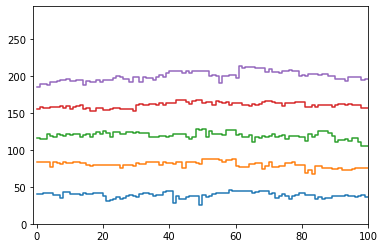

In [20]:
N = 100
M = 5
T = 20

#generating the model
BallisticDepositionModel = BallisticDeposition(N)


#initialize drawing
plt.axes(xlim = (-1, N), ylim = (0, 2*(T+1)*(M+2))) # the axes are set by experimenting. don't try to interpret (M+2)*(T+1) as something model specific

#updating and drawing
for i in range(M):
    BallisticDepositionModel.UpdateConfiguration(T)
    plt.step(np.arange(N+1), np.append(BallisticDepositionModel.Heights,BallisticDepositionModel.Heights[-1]), where='post')

#showing the plot
plt.show()

In [21]:
N = 100
M = 400
T = 64
Column = 50

dt = 1
Data = []

for m in range(M): # repeat the experiment M times
    BallisticDepositionModel = BallisticDeposition(N) #create an instance of BallisticDeposition class
    for i in range(int(T/dt)): #make small dt steps (t/dt times) to omit recursion problems
        BallisticDepositionModel.UpdateConfiguration(dt) #simmulate the growth
    Data.append(BallisticDepositionModel.Heights[Column]/T) #add a scaled (divided by t) height function to an array
c1 = np.mean(Data) # calculate the mean value of Data
print(c1)

2.049453125


In [22]:
Times = [64,128,256,512]
for T in Times: #iterate through all values of time. for evry time we generate a new data and calculate the value of c1. 
    Data = [] #assign empty list for the values of a column height
    for m in range(M):#repeat the experiment M times
        BallisticDepositionModel = BallisticDeposition(N)#build an empty model to start with
        for i in range(int(T/dt)):#grow the model in smasll time increments dt
            BallisticDepositionModel.UpdateConfiguration(dt)
        Data.append(BallisticDepositionModel.Heights[Column]/T)#calculate the height of a middle column and divide it by T. 
                                                            #Write down the value into data list
    c1 = np.mean(Data)
    print(c1)

2.0457421875
2.08138671875
2.09759765625
2.1048046875


From the above one can see that the constant $c_1$ increases with the growth of $T$, but not significantly.

In [23]:
N = 100
M = 400
T = 64
dt = 1

Column1 = 20
Column2 = 40
Column3 = 60
Data1 = []
Data2 = []
Data3 = []

for m in range(M):
    BallisticDepositionModel = BallisticDeposition(N)
    for j in range(int(T/dt)):
        BallisticDepositionModel.UpdateConfiguration(dt)
    Data1.append((BallisticDepositionModel.Heights[Column1]-c1*T)/(T**(1/3)))
    Data2.append((BallisticDepositionModel.Heights[Column2]-c1*T)/(T**(1/3)))
    Data3.append((BallisticDepositionModel.Heights[Column3]-c1*T)/(T**(1/3)))

In [24]:
#we prepare a dataframe containing the data to analyse
Columns = [Column1, Column2, Column3]
Data = pd.DataFrame(dict(zip(Columns,[Data1,Data2,Data3])))
print(Data)

           20        40        60
0   -2.176875 -0.676875 -2.426875
1    1.823125  1.323125  1.323125
2   -1.176875 -0.926875 -2.176875
3    1.573125  1.073125  0.573125
4    1.073125  0.323125 -2.926875
..        ...       ...       ...
395 -0.176875 -2.176875  0.323125
396 -1.676875  0.823125 -1.926875
397 -1.426875 -1.426875 -2.426875
398  0.073125  1.823125 -4.176875
399 -1.676875  0.323125 -2.176875

[400 rows x 3 columns]


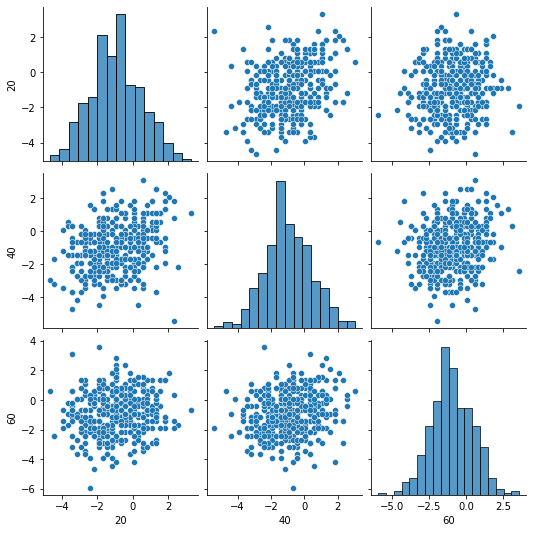

In [25]:
sns.pairplot(Data)
plt.show()

From the above one can see that the distribution of the height function at every column is no longer close to normal. Points of scatter plots are now less sprea and thus show a presence of a correlation between the heights at different columns. 

_Data1 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

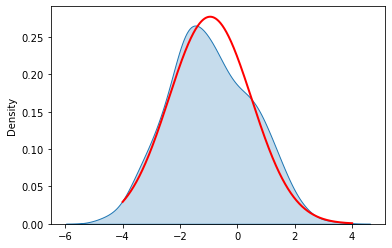

In [26]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data1)

#plot the histogram
axes = sns.kdeplot(Data1, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [27]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data1)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is not normal


_Data2 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

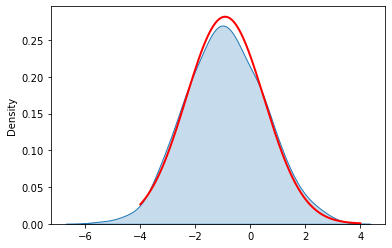

In [28]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data2)

#plot the histogram
axes = sns.kdeplot(Data2, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [35]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data2)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is normal


_Data3 normality_

We first fit the normal distribution to visualise the quality of fitting and then run the Shapiro-Wilk test to check the fitting with statistical methods.

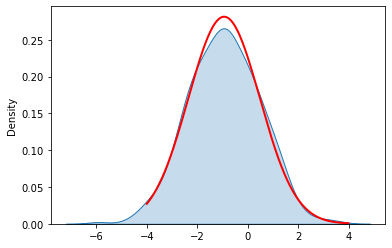

In [30]:
#calculate the parameters of normal distribution to fit
mu, sigma = stats.norm.fit(Data3)

#plot the histogram
axes = sns.kdeplot(Data3, fill=True)

# calculate the pdf over a range of values
x = np.arange(-4, +4, 0.001)                                                   
theoretical = stats.norm.pdf(x, loc=mu, scale=sigma)
                            
# and plot on the same axes that seaborn put the histogram
axes.plot(x, theoretical, 'r', lw=2)         
plt.show()

In [34]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(Data3)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is normal


Correlation matrix

In [36]:
Data.corr()

,20,40,60
20,1.000000,0.304242,0.127095
40,0.304242,1.000000,0.182631
60,0.127095,0.182631,1.000000


As one can see, the correlations are much higher than in the case of random deposition model. We can also observe the decrease of correlations with an increase of distance in between columns. This is also theoretically predicted to be true. The correlations between columns heights should increase as $d^{-2/3}$, where $d$ is the distance between columns.

## Animation of the growth


In [37]:
class Deposition: 
    """This is a parent class for all deposition models. RandomDeposition and 
    BallisticDeposition classes will inherit common behaviour from this class.
    """
# --------------------------------------------------------------------------------        
    def __init__(self, size): # this is a constructor of an object of class Deposition
        """This creates an instance of a class Deposition of length size.
        
        The instance would have 5 fields:
        
        Size - width of the lattice
        Heights - current heights of every column
        CurrentTime - currenttime of the configuration since its creation
        Times - times taken for the next block to fall in each column since now
        NextBrick - the position of the next brick to fall; this corresponds to a minimum of Times
        """
        if (not (isinstance(size, int)) or size <= 0): #checks whether the size is integer and positive
            raise ValueError ("The size of the model should be positive integer.")
        
        self.Size = size # assigns size of the system
        self.Heights = np.zeros(size, dtype = 'int') #assigns Heights to be the list of zeros
        self.CurrentTime = 0 #assigns current time to be 0
        
        self.Times = np.random.exponential(scale = 1, size = size) #assigns random, exponentially distributed times until the next block fall
        self.NextBrick = np.argmin(self.Times) #evaluates the column number where next brick will fall
        
# --------------------------------------------------------------------------------
    def __str__(self): #defines a format of output of the instance of class Deposition
        return "At T = {:.2f} the height function is {}".format(self.CurrentTime,self.Heights)
        
# --------------------------------------------------------------------------------        
    def UpdateHeights(self, index): #Defines the way a new block is attached
        """This method is not implemented because it will have a different way
        of implementation for different child classes        
        """
        raise NotImplementedError ("The method is not implemented")

# --------------------------------------------------------------------------------    
    def UpdateConfiguration(self, dt):
        """
        This is a method that simmulates a configuration of the model after time dt.
        If this time is less than the time until next brick to fall, 
        then we just update all times by shifting them by dt.
        If there is a brick to fall in less than dt time, then we simmulate the fall,
        calculate the time left to simmulate and repeat the procedure. This method
        is implemented using recursion.
        """
        TimeToNextBrick = self.Times[self.NextBrick] #calculate the time until next brick to fall
        
        if (dt<TimeToNextBrick): #if there is no brick to fall, then just shift all times
            self.Times -= dt
            self.CurrentTime += dt
        else: #if there is a brick to fall, shift times until the next fall happening
            self.Times -= TimeToNextBrick
            self.CurrentTime += TimeToNextBrick
            
            self.UpdateHeights(self.NextBrick) #stick a brick
            
            self.Times[self.NextBrick] = np.random.exponential(scale = 1) #generate a new time until next brick for the column where the last brick has fallen
            self.NextBrick = np.argmin(self.Times) # recalculate the index of the column where the next brick will fall
            
            self.UpdateConfiguration(dt-TimeToNextBrick) #continue the update for the rest of the time
# --------------------------------------------------------------------------------    
    def InitializeDraw(self): #initializes animation by drawing the first frame
        return line,
# --------------------------------------------------------------------------------   
    def Animate(self,i): #animates the model by updating it in one time step
        self.UpdateConfiguration(1)
        return line,

In [38]:
class Deposition: 
    """This is a parent class for all deposition models. RandomDeposition and 
    BallisticDeposition classes will inherit common behaviour from this class.
    """
# --------------------------------------------------------------------------------        
    def __init__(self, size): # this is a constructor of an object of class Deposition
        """This creates an instance of a class Deposition of length size.
        
        The instance would have 5 fields:
        
        Size - width of the lattice
        Heights - current heights of every column
        CurrentTime - currenttime of the configuration since its creation
        Times - times taken for the next block to fall in each column since now
        NextBrick - the position of the next brick to fall; this corresponds to a minimum of Times
        """
        if (not (isinstance(size, int)) or size <= 0): #checks whether the size is integer and positive
            raise ValueError ("The size of the model should be positive integer.")
        
        self.Size = size # assigns size of the system
        self.Heights = np.zeros(size, dtype = 'int') #assigns Heights to be the list of zeros
        self.CurrentTime = 0 #assigns current time to be 0
        
        self.Times = np.random.exponential(scale = 1, size = size) #assigns random, exponentially distributed times until the next block fall
        self.NextBrick = np.argmin(self.Times) #evaluates the column number where next brick will fall
        
# --------------------------------------------------------------------------------
    def __str__(self): #defines a format of output of the instance of class Deposition
        return "At T = {:.2f} the height function is {}".format(self.CurrentTime,self.Heights)
        
# --------------------------------------------------------------------------------        
    def UpdateHeights(self, index): #Defines the way a new block is attached
        """This method is not implemented because it will have a different way
        of implementation for different child classes        
        """
        raise NotImplementedError ("The method is not implemented")

# --------------------------------------------------------------------------------    
    def UpdateConfiguration(self, dt):
        """
        This is a method that simmulates a configuration of the model after time dt.
        If this time is less than the time until next brick to fall, 
        then we just update all times by shifting them by dt.
        If there is a brick to fall in less than dt time, then we simmulate the fall,
        calculate the time left to simmulate and repeat the procedure. This method
        is implemented using recursion.
        """
        TimeToNextBrick = self.Times[self.NextBrick] #calculate the time until next brick to fall
        
        if (dt<TimeToNextBrick): #if there is no brick to fall, then just shift all times
            self.Times -= dt
            self.CurrentTime += dt
        else: #if there is a brick to fall, shift times until the next fall happening
            self.Times -= TimeToNextBrick
            self.CurrentTime += TimeToNextBrick
            
            self.UpdateHeights(self.NextBrick) #stick a brick 
            #!!! This is a place we add the brick. It has been already added so we do know its position
            #!!! It is (NextBrick,Heights[NextBrick])
            self.DrawASquare(self.NextBrick,self.Heights[self.NextBrick]-1)
            # we have put -1 to match coordinates starting from 0. The first brick in the column is drawn starting from level 0
            
            self.Times[self.NextBrick] = np.random.exponential(scale = 1) #generate a new time until next brick for the column where the last brick has fallen
            self.NextBrick = np.argmin(self.Times) # recalculate the index of the column where the next brick will fall
            
            self.UpdateConfiguration(dt-TimeToNextBrick) #continue the update for the rest of the time
# --------------------------------------------------------------------------------    
    def InitializeDraw(self): #initializes animation by drawing the first frame
        return line,
# --------------------------------------------------------------------------------   
    def Animate(self,i): #animates the model by updating it in one time step
        self.UpdateConfiguration(1)
        return line,
# --------------------------------------------------------------------------------  
    def DrawASquare(self, x,y,color='b',alpha=0.5):
        """
        This is a method to draw a square of size 1x1 with left bottom corner having
        coordinates x,y.
        color='b' - means that we allow user to enter a color of the block, but by default it is blue
        alpha=0.5 - means that we allow user to enter a transparency of the block, but by default it is 0.5
        """
        ax.add_patch(plt.Rectangle((x,y),1,1,fill = True, alpha = alpha, facecolor = color, edgecolor = color))

class RandomDeposition(Deposition):
    
# --------------------------------------------------------------------------------            
    def UpdateHeights(self, index): 
        """This is an implementation of UpdateHeights method from the parent class.
        """
        self.Heights[index] = self.Heights[index]+1 
        # if the brick falls into column i, we just increase its height by 1

class BallisticDeposition(Deposition):
    
# --------------------------------------------------------------------------------            
    def UpdateHeights(self, index):
        """
        This is an implementation of UpdateHeights method from the parent class.
        """
        
        HeightOnLeft = 0 # define a variable to store the height of a neighbouring column on the left
        HeightOnRight = 0 # define a variable to store the height of a neighbouring column on the right
        
        if (index>0): 
            # If the column we try to update is not the first one, then we need to check what is the height on the left. 
            # Otherwise it will be left as zero and would not contribute to a change of the height function
            HeightOnLeft = self.Heights[index-1]
        if (index<self.Size-1): 
            # If the column we try to update is not the last one, then we need to check what is the height on the right. 
            # Otherwise it will be left as zero and would not contribute to a change of the height function
            HeightOnRight = self.Heights[index+1]
        
        #Obviously, a new block would occupy the height which is the maximum of 
        # - (left height) if it sticks to a left column
        # - (current height+1) if it sticks to a current column
        # - (right height) if it sticks to a right column
        self.Heights[index] = max(HeightOnLeft,HeightOnRight,self.Heights[index]+1)
        

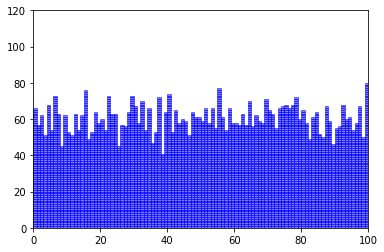

In [39]:
%matplotlib inline
from matplotlib import animation as animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')

N = 100
T = 60
RandomDepositionModel = RandomDeposition(N)

# First set up the figure and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(0, 2*T))
line, = ax.step([], [], lw=2, where = 'post')

#call the animator

anim = animation.FuncAnimation(fig, RandomDepositionModel.Animate, init_func=RandomDepositionModel.InitializeDraw,frames= int(T), interval=300, blit=True)
anim

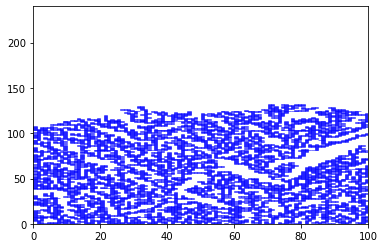

In [40]:
N = 100
T = 60
BallisticDepositionModel = BallisticDeposition(N)

# First set up the figure and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(0, 4*T))
line, = ax.step([], [], lw=2, where = 'post')

#call the animator

anim = animation.FuncAnimation(fig, BallisticDepositionModel.Animate, init_func=BallisticDepositionModel.InitializeDraw,frames= int(T), interval=300, blit=True)
anim